<a href="https://colab.research.google.com/github/1UC1F3R616/myGoogleCollabNotebooks/blob/master/WM_L_DA3_18BCE0557_KUSHAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1) Write a python program to calculate the degree prestige, proximity prestige and rank prestige using a graph dataset given in the following link.

In [14]:
# Uploading a File on Google Collab
from google.colab import files
uploaded = files.upload()

Saving credit_card_approval.xls to credit_card_approval (1).xls


In [ ]:
# Loading a Wiki-Vote.txt
import pandas as pd
# df2 = np.array(uploaded['Wiki-Vote.txt'].decode('utf-8').split('\n\r'))
# print(df2)
# print(len(df2))

data = (uploaded['Wiki-Vote.txt']).decode("utf-8")
content = [my_iter.split('\t') for my_iter in data.split('\r\n')]
#print(len(content))
#print(content[0:5])
df = pd.DataFrame(content)
df.columns = ['user_A', 'user_B']
df = df[~df['user_A'].isnull()]
df = df[~df['user_B'].isnull()]
df.dropna()
print(df.shape)
print(df.head())
denominator = df.shape[0] - 1 # n - 1
print(denominator)

(103689, 2)
  user_A user_B
0     30   1412
1     30   3352
2     30   5254
3     30   5543
4     30   7478
103688


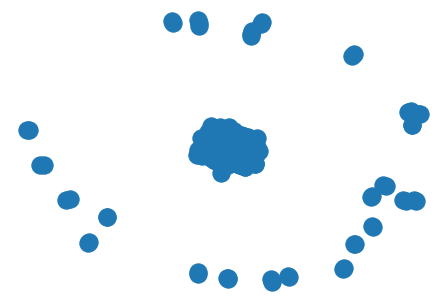

In [ ]:
import networkx as nx

G = nx.from_pandas_edgelist(df=df, source='user_A', target='user_B', edge_attr=['user_A', 'user_B'])
nx.draw(G)
# G.add_nodes_from(nodes_for_adding=df.ID.tolist())

### Degree Prestige

In [ ]:
# Formula = d(i)/(n-1) && consider only in links
print(G.number_of_nodes())
print(G.number_of_edges())
degree_prestige = []

for node in G.nodes():
  if node == None:
    continue
  
  degree_prestige.append([node, G.degree(node)/denominator])

print(degree_prestige[0:10])
# for y, x in enumerate(degree_prestige):
#   if x[0] in ['100', '1000', '10']:
#     print(degree_prestige[y])

7117
100763
[['30', 0.0002700408919064887], ['1412', 0.00027968520947457755], ['3352', 0.004600339479978397], ['5254', 0.002806496412313865], ['5543', 0.002536455520407376], ['7478', 0.0008872772162641771], ['3', 0.000491860195972533], ['28', 0.0022181930406604427], ['39', 0.0006075920067895996], ['54', 0.00043399429056399967]]


### proximity prestige

In [ ]:
# Took a lot time, sadly dijikstra algorithm on this huge dataset
distance = []
distance_summation = 0
n = 0
for dest in G.nodes:
  distance_summation = 0
  n = 0
  for src in G.nodes:
    if (nx.has_path(G,src,dest) == True):
      try:
        distance_summation = distance_summation + nx.shortest_path_length(G, source=src, target=dest, weight=None, method='dijkstra')
      except:
        pass
      n = n + 1
  if distance_summation == n: # that is n==0 This node can't be reacher by any node
    distance.append([dest, 0])
  else:
    distance.append([dest, distance_summation/(n - 1)])
  
pp_series = pd.Series([i[1] for i in distance], index = [i[0] for i in distance])
pp_series.head(10)

### Rank Prestige

In [ ]:
pagerank = nx.pagerank(G, alpha=0.9) # Taking default value 0.9
rp=[]
for src in G.nodes:
  rank=0
  for dest in G.nodes:
    if G.has_edge(dest, node):
      rank+=pagerank[dest]
  rp.append(rank)
rp_series = pd.Series(rp, index = G.nodes)
rp_series.head(10)


30      0.000141
1412    0.000141
3352    0.000141
5254    0.000141
5543    0.000141
7478    0.000141
3       0.000141
28      0.000141
39      0.000141
54      0.000141
dtype: float64

## Question 2) Write a python program to show the implementation HITS algorithm for the following graph and display the authority as well as hub score for all the nodes. (stopping criteria:- ε = 0.04 for both hub and authority)


Name: 
Type: DiGraph
Number of nodes: 6
Number of edges: 13
Average in degree:   2.1667
Average out degree:   2.1667


,Hub Score,Authority Score
Wikipedia,0.173621,0.108419
Bing,0.051800,0.350105
Google,0.296156,0.148869
Rediff,0.121821,0.108419
Altavista,0.173621,0.175770
Yahoo,0.182981,0.108419


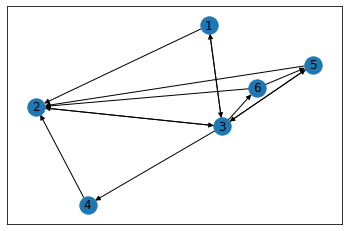

In [10]:
import networkx as nx
import pandas as pd

DG = nx.DiGraph()

DG.add_edges_from([
(1,2)
,(1,3)
,(2,3)
,(3,1)
,(3,2)
,(3,4)
,(3,5)
,(3,6)
,(4,2)
,(5,2)
,(5,3)
,(6,2)
,(6,5)], nodetype=int)

print(nx.info(DG))
nx.draw_networkx(DG)


hub_score, authority_score = nx.hits(DG, tol = 0.04, normalized = True)
hits = pd.DataFrame(data = {'Hub Score':list(hub_score.values()), 'Authority Score': list(authority_score.values())}, index = ['Wikipedia', 'Bing', 'Google', 'Rediff', 'Altavista', 'Yahoo'])
hits

### Question 3) Write a python program to show the implementation of Decision Tree and NaïveBayes techniques using the below mentioned dataset..
- Handle missing values, If any
- Use 5-fold cross validation technique
- Prepare the confusion matrix, find out the precision, recall value, F-measure
and prediction accuracy.
- Prepare ROC and AUC curve based on the result obtained.
- Compare the results obtained using these two techniques in order to assess
their performance for the considered dataset.

Data Set Characteristics: Multivariate

Number of Instances: 690

Area:Financial

Attribute Characteristics: Categorical, Integer, Real

Number of Attributes:15

Missing Values?: Yes


In [47]:
## Loading The xls file
filename = 'credit_card_approval.xls'
import io
df = pd.read_excel(io.BytesIO(uploaded[filename]))
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


#### Handle missing values, If any

In [48]:
df.isnull().any(axis = 1).sum()

df = df.rename(columns=lambda x: x.strip())
# for x in (df.columns):
#   print(x)
print(df.size)

for column_name in df.columns:
  df = df[df[column_name] != '?']
print(df.size)

11040
10448


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [49]:
df.Target = df.Target.replace(['+','-'],[1,0])
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      653 non-null    object 
 1   A2      653 non-null    object 
 2   A3      653 non-null    float64
 3   A4      653 non-null    object 
 4   A5      653 non-null    object 
 5   A6      653 non-null    object 
 6   A7      653 non-null    object 
 7   A8      653 non-null    float64
 8   A9      653 non-null    object 
 9   A10     653 non-null    object 
 10  A11     653 non-null    int64  
 11  A12     653 non-null    object 
 12  A13     653 non-null    object 
 13  A14     653 non-null    object 
 14  A15     653 non-null    int64  
 15  Target  653 non-null    int64  
dtypes: float64(2), int64(3), object(11)
memory usage: 86.7+ KB


In [63]:
# from sklearn import tree
# from sklearn.model_selection import train_test_split
# X, Y = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X, Y)

data_encoded=pd.get_dummies(data=df,drop_first=True)
print(data_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Columns: 538 entries, A3 to A14_2000
dtypes: float64(2), int64(3), uint8(533)
memory usage: 370.5 KB
None


In [64]:
data_encoded.describe(include=['float64'])

,A3,A8
count,653.000000,653.000000
mean,4.829533,2.244296
std,5.027077,3.371120
min,0.000000,0.000000
25%,1.040000,0.165000
50%,2.835000,1.000000
75%,7.500000,2.625000
max,28.000000,28.500000


In [66]:
X = data_encoded.drop(columns=['Target'])
y = data_encoded.Target
X.head()

,A3,A8,A11,A15,A1_b,A2_15.17,A2_15.75,A2_15.83,A2_15.92,A2_16.0,A2_16.08,A2_16.17,A2_16.25,A2_16.33,A2_16.5,A2_16.92,A2_17.08,A2_17.25,A2_17.33,A2_17.42,A2_17.5,A2_17.58,A2_17.67,A2_17.83,A2_17.92,A2_18.0,A2_18.08,A2_18.17,A2_18.25,A2_18.33,A2_18.42,A2_18.5,A2_18.58,A2_18.67,A2_18.83,A2_18.92,A2_19.0,A2_19.17,A2_19.33,A2_19.42,...,A14_396,A14_399,A14_400,A14_408,A14_410,A14_416,A14_420,A14_422,A14_431,A14_432,A14_434,A14_440,A14_443,A14_450,A14_454,A14_455,A14_460,A14_465,A14_470,A14_480,A14_487,A14_491,A14_500,A14_510,A14_515,A14_519,A14_520,A14_523,A14_550,A14_560,A14_583,A14_600,A14_640,A14_680,A14_711,A14_720,A14_760,A14_840,A14_980,A14_2000
0,0.000,1.25,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.460,3.04,6,560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.500,1.50,0,824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.540,3.75,5,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5.625,1.71,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled[0]

In [72]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
scores = cross_validate(MultinomialNB(), X_scaled, y, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'), return_train_score=False)
print('Average Test Accuracy:',scores['test_accuracy'].mean(), '\nAverage Test Precision:',scores['test_precision'].mean(),'\nAverage Test Recall:',scores['test_recall'].mean(),'\nAverage Test F1 Score:',scores['test_f1'].mean())

Average Test Accuracy: 0.7732824427480915 
Average Test Precision: 0.7467804814233385 
Average Test Recall: 0.7937853107344632 
Average Test F1 Score: 0.764289069067613


In [74]:
scores = cross_validate(GaussianNB(), X_scaled, y, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'), return_train_score=False)
print('Average Test Accuracy:',scores['test_accuracy'].mean(), '\nAverage Test Precision:',scores['test_precision'].mean(),'\nAverage Test Recall:',scores['test_recall'].mean(),'\nAverage Test F1 Score:',scores['test_f1'].mean())

Average Test Accuracy: 0.5834644744568409 
Average Test Precision: 0.5509803047194352 
Average Test Recall: 0.49355932203389824 
Average Test F1 Score: 0.5128660017447159


In [76]:
scores = cross_validate(DecisionTreeClassifier(), X_scaled, y, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'), return_train_score=False)
print('Average Test Accuracy:',scores['test_accuracy'].mean(), '\nAverage Test Precision:',scores['test_precision'].mean(),'\nAverage Test Recall:',scores['test_recall'].mean(),'\nAverage Test F1 Score:',scores['test_f1'].mean())

Average Test Accuracy: 0.8330945390487375 
Average Test Precision: 0.845224358974359 
Average Test Recall: 0.8141807909604519 
Average Test F1 Score: 0.8224625801314772


In [78]:
nb = MultinomialNB().fit(X_scaled, y)
metrics.confusion_matrix(y, nb.predict(X_scaled))

array([[326,  31],
       [ 29, 267]])

In [77]:
tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best').fit(X_scaled, y)
metrics.confusion_matrix(y, tree.predict(X_scaled))

array([[286,  71],
       [ 16, 280]])

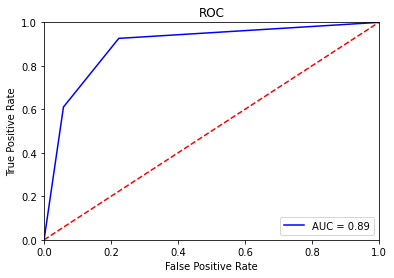

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)
tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best').fit(X_train,y_train)
probs = tree.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc1 = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

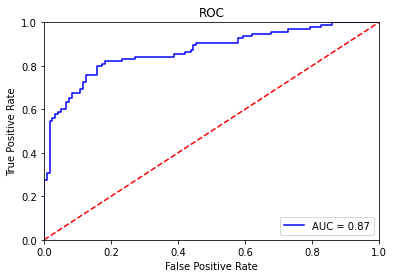

In [85]:
nb = MultinomialNB().fit(X_train, y_train)
probs = nb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc2 = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

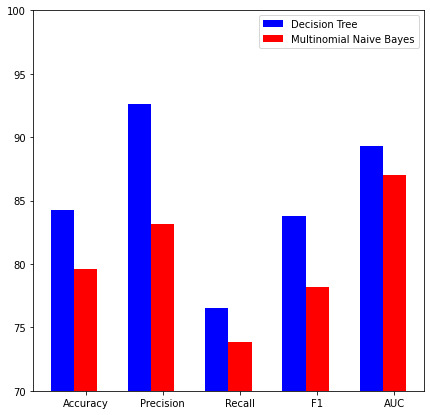

In [86]:
import numpy as np

x=np.array(list(range(5)))
probs = tree.predict(X_test)
y=np.array([metrics.accuracy_score(probs, y_test), metrics.precision_score(probs, y_test), metrics.recall_score(probs, y_test), metrics.f1_score(probs, y_test), roc_auc1])*100
prob = nb.predict(X_test)
y1=np.array([metrics.accuracy_score(prob, y_test), metrics.precision_score(prob, y_test), metrics.recall_score(prob, y_test), metrics.f1_score(prob, y_test), roc_auc2])*100

plt.figure(figsize=(7,7))
plt.bar(x-0.3, y, width=0.3, color='b', align='center', label='Decision Tree')
plt.bar(x, y1, width=0.3, color='r', align='center', label = 'Multinomial Naive Bayes')
plt.gca().set_ylim([70,100])
plt.xticks(x, ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])
plt.legend()
plt.show()

### So we cleary have Decision Tree as a winner here.